In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from astropy.io import fits
import os

# Define the path to your FITS file in Google Drive
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct.")
else:
    # Open the FITS file
    with fits.open(file_path) as hdul:
        print(f"Successfully opened FITS file: {file_path}")
        print("\nFITS file structure (Header Data Units - HDUs):")
        hdul.info()

        # Iterate through each HDU and display its header and a sample of data
        for i, hdu in enumerate(hdul):
            print(f"\n--- HDU {i} ---")
            print("Header:")
            # Display header for the current HDU
            print(hdu.header)

            # Display data if available
            if hdu.data is not None:
                print("\nData (first 5 rows/elements, or full if small):")
                if hasattr(hdu.data, 'shape') and len(hdu.data.shape) > 1:
                    # For tabular data (e.g., FITS_rec object)
                    display(hdu.data[:5]) # Display first 5 rows
                elif hdu.data.size > 0:
                    # For array data or other types
                    display(hdu.data.flatten()[:10]) # Display first 10 elements
                else:
                    print("No visible data or data is empty.")
            else:
                print("No data associated with this HDU.")

Successfully opened FITS file: /content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits

FITS file structure (Header Data Units - HDUs):
Filename: /content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (1183,)   uint8   
  1  /Volumes/T7 Archive/environment/3DHST_V415/analysis/ALL5phot_zbest_s    1 BinTableHDU     46   16859R x 16C   [J, I, 3A, D, D, D, E, E, E, E, E, E, E, E, D, D]   

--- HDU 0 ---
Header:
SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                 1183 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT   

array([ 60,  63, 120, 109, 108,  32, 118, 101, 114, 115], dtype=uint8)


--- HDU 1 ---
Header:
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                   81 / width of table in bytes                        NAXIS2  =                16859 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   16 / number of columns                              EXTNAME = '/Volumes/T7 Archive/environment/3DHST_V415/analysis/ALL5phot_zbest_s'TTYPE1  = 'id      '           / label for column 1                             TFORM1  = 'J       '           / format for column 1                            TNULL1  =          -2147483648 / blank value for column 1                       TTYPE2  = 'fieldn

FITS_rec([(371, 1, 'COS', 150.10543823, 2.18522   , 21.10150386, 1.1415,  1.1338,  1.1496, 8.4, 9.1, 0.5, 10.65,  0.29, 1.51269776, 1.10314983),
          (419, 1, 'COS', 150.10273743, 2.18377852, 23.6663967 , 2.1979,  2.1785,  2.27  , 8. , 8.4, 1. , 10.05,  1.15, 0.85454261, 0.68444967),
          (431, 1, 'COS', 150.09890747, 2.18443656, 23.15657425, 0.5643,  0.545 ,  0.585 , 8.6, 9. , 0. ,  8.79, -0.67, 0.78900443, 0.37589584),
          (445, 1, 'COS', 150.10583496, 2.18444419, 22.84290658, 1.2122,  1.2094,  1.2276, 8.8, 9.6, 0.6, 10.48, -0.8 , 2.23380816, 1.48300898),
          (457, 1, 'COS', 150.10340881, 2.18571544, 21.59623758, 0.5336, -1.    , -1.    , 7.2, 8. , 0.5,  9.13, -0.66, 0.63802186, 0.40370194),
          (540, 1, 'COS', 150.10731506, 2.18602777, 22.28929321, 0.6752,  0.654 ,  0.702 , 9. , 9. , 0.9,  9.49,  0.44, 0.99063947, 0.88318508),
          (579, 1, 'COS', 150.10395813, 2.18644333, 23.0213513 , 1.9139,  1.9024,  2.0761, 8.8, 9.4, 2. , 11.42,  1.14, 2.30285477

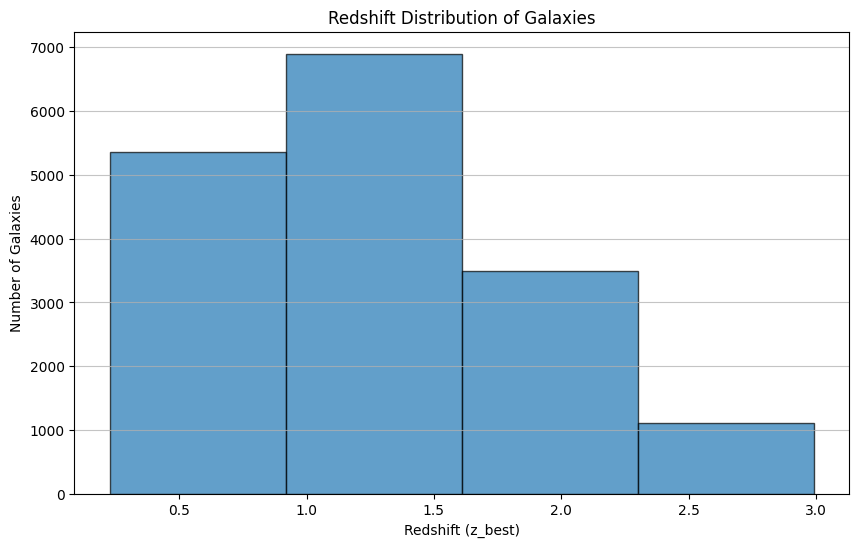


Redshift data statistics (z_best):
count    16859.000000
mean         1.289961
std          0.571288
min          0.226900
25%          0.829420
50%          1.164200
75%          1.659130
max          2.992830
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np # Import numpy for float64

# Re-open the FITS file to access the data, as the previous 'with' block would have closed it
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

with fits.open(file_path) as hdul:
    # Assuming the galaxy data is in HDU 1, which is a BinTableHDU
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Convert the FITS_rec data to a pandas DataFrame
        # We need to decode byte strings if present, though for numerical data it might not be strictly necessary.
        # Let's directly select the 'z_best' column first.
        redshift_data = data['z_best']

        # Create a pandas Series for easier plotting
        df_redshift = pd.Series(redshift_data)

        # Convert to float64 to prevent TypeError with describe() method
        df_redshift = df_redshift.astype(np.float64)

        # Plot the redshift distribution
        plt.figure(figsize=(10, 6))
        # Define bins for the redshift distribution, for example, 4 bins
        # You can adjust the number of bins or specify bin edges if needed
        num_bins = 4
        plt.hist(df_redshift, bins=num_bins, edgecolor='black', alpha=0.7)
        plt.title('Redshift Distribution of Galaxies')
        plt.xlabel('Redshift (z_best)')
        plt.ylabel('Number of Galaxies')
        plt.grid(axis='y', alpha=0.75)
        plt.show()

        print(f"\nRedshift data statistics (z_best):")
        print(df_redshift.describe())

    '''   # To confirm the bin edges and counts:
        counts, bin_edges, _ = plt.hist(df_redshift, bins=num_bins, edgecolor='black', alpha=0.0) # plot invisible to get data
        plt.close() # Close the invisible plot
        print("\nRedshift Bins:")
        for i in range(len(bin_edges) - 1):
            print(f"Bin {i+1}: {bin_edges[i]:.2f} - {bin_edges[i+1]:.2f} (Count: {int(counts[i])})")

    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")'''

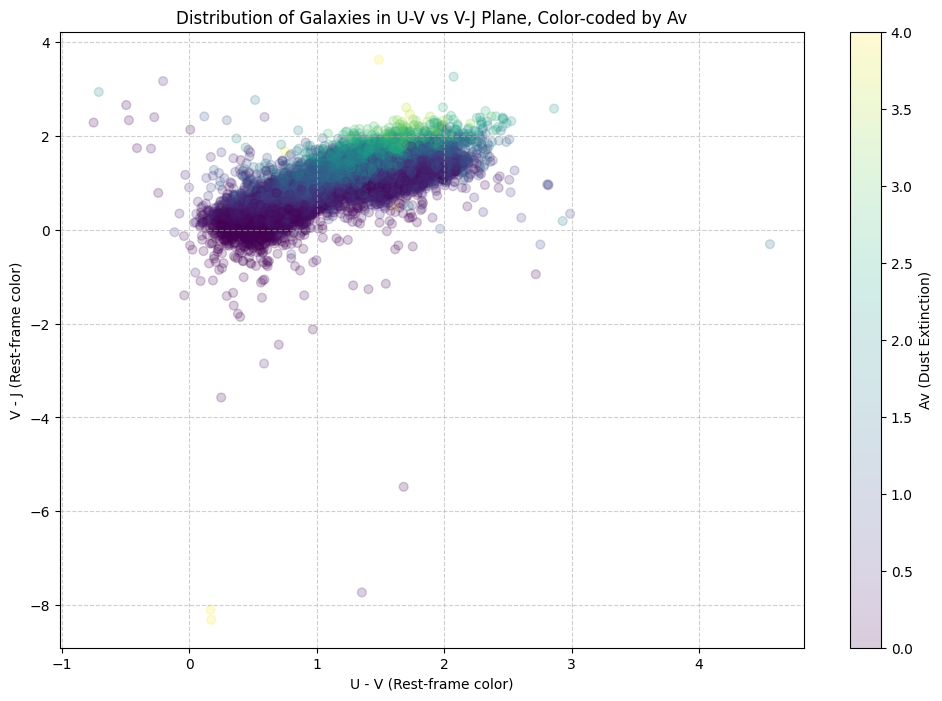


Statistics for U-V colors:
count    16859.000000
mean         1.012969
std          0.476844
min         -0.752633
25%          0.662682
50%          0.861782
75%          1.333401
max          4.556762
dtype: float64

Statistics for V-J colors:
count    16859.000000
mean         0.774620
std          0.506883
min         -8.308620
25%          0.417546
50%          0.691458
75%          1.129725
max          3.622845
dtype: float64

Statistics for Av values:
count    16859.000000
mean         0.624622
std          0.586760
min          0.000000
25%          0.200000
50%          0.500000
75%          0.900000
max          4.000000
dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Re-open the FITS file to access the data
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Extract the required columns
        umv_colors = data['UmV'].astype(np.float64)
        vmj_colors = data['VmJ'].astype(np.float64)
        av_values = data['Av'].astype(np.float64)
        passive_mask = (
      (data['UmV'] > data['VmJ'] * 0.88 + 0.59) & \
      (data['UmV'] > 1.3) & \
      (data['VmJ'] < 1.6)
      )
        # Create the scatter plot
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(umv_colors, vmj_colors, c=av_values, cmap='viridis', s=40, alpha=0.2)

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Av (Dust Extinction)')

        # Set labels and title
        plt.xlabel('U - V (Rest-frame color)')
        plt.ylabel('V - J (Rest-frame color)')
        plt.title('Distribution of Galaxies in U-V vs V-J Plane, Color-coded by Av')
        plt.grid(True, linestyle='--', alpha=0.6)

        plt.show()

        print('\nStatistics for U-V colors:')
        print(pd.Series(umv_colors).describe())
        print('\nStatistics for V-J colors:')
        print(pd.Series(vmj_colors).describe())
        print('\nStatistics for Av values:')
        print(pd.Series(av_values).describe())

    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")

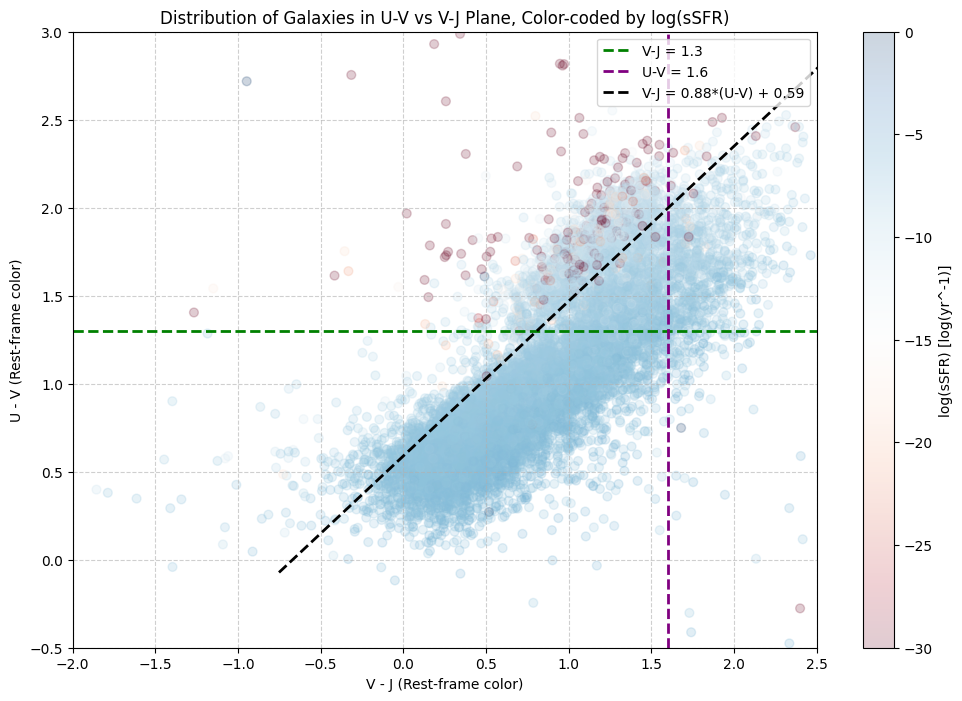


Statistics for U-V colors:
count    16859.000000
mean         1.012969
std          0.476844
min         -0.752633
25%          0.662682
50%          0.861782
75%          1.333401
max          4.556762
dtype: float64

Statistics for V-J colors:
count    16859.000000
mean         0.774620
std          0.506883
min         -8.308620
25%          0.417546
50%          0.691458
75%          1.129725
max          3.622845
dtype: float64

Statistics for log(sSFR) values:
count    16859.000000
mean       -10.544684
std          9.487392
min       -111.900000
25%         -9.790000
50%         -9.240000
75%         -9.010000
max          0.000000
dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Define the path to your FITS file in Google Drive
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Extract the required columns
        umv_colors = data['UmV'].astype(np.float64)
        vmj_colors = data['VmJ'].astype(np.float64)
        lsfr_values = data['lsfr'].astype(np.float64)
        lmass_values = data['lmass'].astype(np.float64)

        # Calculate log(sSFR) = log(SFR) - log(Mass)
        log_ssfr_values = lsfr_values - lmass_values

        # Create the scatter plot
        plt.figure(figsize=(12, 8))
        # U-V on X-axis, V-J on Y-axis
        scatter = plt.scatter(vmj_colors, umv_colors, c=log_ssfr_values, cmap='RdBu', s=40, alpha=0.2, vmin=-30, vmax=0)

        # Add color bar
        cbar = plt.colorbar(scatter)
        cbar.set_label('log(sSFR) [log(yr^-1)]')

        # Set labels and title
        plt.ylabel('U - V (Rest-frame color)')
        plt.xlabel('V - J (Rest-frame color)')
        plt.title('Distribution of Galaxies in U-V vs V-J Plane, Color-coded by log(sSFR)')
        plt.grid(True, linestyle='--', alpha=0.6)

        # --- Plotting the three requested lines ---

        # Line 1: y = 1.3 (V-J = 1.3)
        # This is a horizontal line across the full U-V range
        plt.axhline(y=1.3, color='green', linestyle='--', linewidth=2, label='V-J = 1.3')
        plt.xlim(-2, 2.5)
        plt.ylim(-0.5, 3)
        # Line 2: x = 1.6 (U-V = 1.6)
        # This is a vertical line across the full V-J range
        plt.axvline(x=1.6, color='purple', linestyle='--', linewidth=2, label='U-V = 1.6')

        # Line 3: y = 0.88*x + 0.59 (V-J = 0.88*(U-V) + 0.59)
        # Plotting this line over a relevant range of U-V values
        x_diagonal = np.linspace(min(umv_colors), max(umv_colors), 100)
        y_diagonal = 0.88 * x_diagonal + 0.59
        plt.plot(x_diagonal, y_diagonal, color='black', linestyle='--', linewidth=2, label='V-J = 0.88*(U-V) + 0.59')

        # Add a legend
        plt.legend(loc='upper right')

        plt.show()

        print('\nStatistics for U-V colors:')
        print(pd.Series(umv_colors).describe())
        print('\nStatistics for V-J colors:')
        print(pd.Series(vmj_colors).describe())
        print('\nStatistics for log(sSFR) values:')
        print(pd.Series(log_ssfr_values).describe())

    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")

In [6]:
import pandas as pd
import numpy as np
from astropy.io import fits

# Define the path to your FITS file
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

# Load the data from the FITS file into a pandas DataFrame
with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Calculate passive_mask first
        passive_mask = (
            (data['UmV'] > data['VmJ'] * 0.88 + 0.59) &
            (data['UmV'] > 1.3) &
            (data['VmJ'] < 1.6)
        )

        # Convert to DataFrame, selecting only necessary columns for now
        # and ensuring correct data types.
        df_galaxies = pd.DataFrame({
            'z_best': data['z_best'].astype(np.float64),
            'UmV': data['UmV'].astype(np.float64),
            'VmJ': data['VmJ'].astype(np.float64),
            'lmass': data['lmass'].astype(np.float64),
            'lsfr': data['lsfr'].astype(np.float64),
            'passive': passive_mask # Now 'passive_mask' is a variable
        })
        print("Galaxy data loaded into df_galaxies DataFrame.")
        print(df_galaxies.head())
    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")

Galaxy data loaded into df_galaxies DataFrame.
   z_best       UmV       VmJ  lmass  lsfr  passive
0  1.1415  1.512698  1.103150  10.65  0.29    False
1  2.1979  0.854543  0.684450  10.05  1.15    False
2  0.5643  0.789004  0.375896   8.79 -0.67    False
3  1.2122  2.233808  1.483009  10.48 -0.80     True
4  0.5336  0.638022  0.403702   9.13 -0.66    False


In [7]:
from astropy.io import fits
import numpy as np

# Define the path to your FITS file
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

# Open the FITS file to access the 'data' object
with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Create the boolean mask for passive galaxies using the specified conditions
        # Ensure each condition is enclosed in parentheses for correct logical operation
        passive_mask = (
            (data['UmV'] > data['VmJ'] * 0.88 + 0.59) &
            (data['UmV'] > 1.3) &
            (data['VmJ'] < 1.6)
        )

        print("Boolean mask 'passive_mask' created.")
        print(f"Number of passive galaxies identified by the mask: {np.sum(passive_mask)}")
        print("\nFirst 10 elements of the 'passive_mask':")
        print(passive_mask[:10])

    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")


Boolean mask 'passive_mask' created.
Number of passive galaxies identified by the mask: 2313

First 10 elements of the 'passive_mask':
[False False False  True False False False False False False]


In [9]:
redshift_bins = [0, 0.8, 1.5, 2.2, np.inf]
redshift_labels = ['z_low', 'z_mid_low', 'z_mid_high', 'z_high']

# Create a new column 'redshift_bin' in the DataFrame
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

# Load the data from the FITS file into a pandas DataFrame
with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Calculate passive_mask first
        passive_mask = (
            (data['UmV'] > data['VmJ'] * 0.88 + 0.59) &
            (data['UmV'] > 1.3) &
            (data['VmJ'] < 1.6)
        )

        # Convert to DataFrame, selecting only necessary columns for now
        # and ensuring correct data types.
        df_galaxies = pd.DataFrame({
            'z_best': data['z_best'].astype(np.float64),
            'UmV': data['UmV'].astype(np.float64),
            'VmJ': data['VmJ'].astype(np.float64),
            'lmass': data['lmass'].astype(np.float64),
            'lsfr': data['lsfr'].astype(np.float64),
            'passive': passive_mask # Now 'passive_mask' is a variable
        })
        print("Galaxy data loaded into df_galaxies DataFrame.")
        print(df_galaxies.head())
    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")
df_galaxies['redshift_bin'] = pd.cut(
    df_galaxies['z_best'],
    bins=redshift_bins,
    labels=redshift_labels,
    right=False, # Use right=False to make bins [a, b) (inclusive of a, exclusive of b)
    include_lowest=True # Include the lowest value in the first bin
)

print("Redshift bins defined and galaxies assigned to bins.")
print("\nCount of galaxies in each redshift bin:")
print(df_galaxies['redshift_bin'].value_counts().sort_index())

Galaxy data loaded into df_galaxies DataFrame.
   z_best       UmV       VmJ  lmass  lsfr  passive
0  1.1415  1.512698  1.103150  10.65  0.29    False
1  2.1979  0.854543  0.684450  10.05  1.15    False
2  0.5643  0.789004  0.375896   8.79 -0.67    False
3  1.2122  2.233808  1.483009  10.48 -0.80     True
4  0.5336  0.638022  0.403702   9.13 -0.66    False
Redshift bins defined and galaxies assigned to bins.

Count of galaxies in each redshift bin:
redshift_bin
z_low         3956
z_mid_low     7451
z_mid_high    3955
z_high        1497
Name: count, dtype: int64


In [11]:
import pandas as pd
import numpy as np
from astropy.io import fits

# Define the path to your FITS file
file_path = '/content/drive/MyDrive/Hos/Hos3/3DHST_Allfields.fits'

# Load the data from the FITS file into a pandas DataFrame
with fits.open(file_path) as hdul:
    if len(hdul) > 1 and isinstance(hdul[1], fits.BinTableHDU):
        data = hdul[1].data

        # Calculate passive_mask first
        passive_mask = (
            (data['UmV'] > data['VmJ'] * 0.88 + 0.59) &
            (data['UmV'] > 1.3) &
            (data['VmJ'] < 1.6)
        )

        # Convert to DataFrame, selecting only necessary columns for now
        # and ensuring correct data types.
        df_galaxies = pd.DataFrame({
            'z_best': data['z_best'].astype(np.float64),
            'UmV': data['UmV'].astype(np.float64),
            'VmJ': data['VmJ'].astype(np.float64),
            'lmass': data['lmass'].astype(np.float64),
            'lsfr': data['lsfr'].astype(np.float64),
            'passive': passive_mask # Now 'passive_mask' is a variable
        })
        print("Galaxy data loaded into df_galaxies DataFrame.")
        print(df_galaxies.head())
    else:
        print("Error: Could not find tabular data in HDU 1 or the file has less than 2 HDUs.")

# Define redshift bins and labels (these were missing in your snippet)
redshift_bins = [0, 0.8, 1.5, 2.2, np.inf]
redshift_labels = ['z_low', 'z_mid_low', 'z_mid_high', 'z_high']

df_galaxies['redshift_bin'] = pd.cut(
    df_galaxies['z_best'],
    bins=redshift_bins,
    labels=redshift_labels,
    right=False, # Use right=False to make bins [a, b) (inclusive of a, exclusive of b)
    include_lowest=True # Include the lowest value in the first bin
)

print("Redshift bins defined and galaxies assigned to bins.")
print("\nCount of galaxies in each redshift bin:")
print(df_galaxies['redshift_bin'].value_counts().sort_index())

Galaxy data loaded into df_galaxies DataFrame.
   z_best       UmV       VmJ  lmass  lsfr  passive
0  1.1415  1.512698  1.103150  10.65  0.29    False
1  2.1979  0.854543  0.684450  10.05  1.15    False
2  0.5643  0.789004  0.375896   8.79 -0.67    False
3  1.2122  2.233808  1.483009  10.48 -0.80     True
4  0.5336  0.638022  0.403702   9.13 -0.66    False
Redshift bins defined and galaxies assigned to bins.

Count of galaxies in each redshift bin:
redshift_bin
z_low         3956
z_mid_low     7451
z_mid_high    3955
z_high        1497
Name: count, dtype: int64


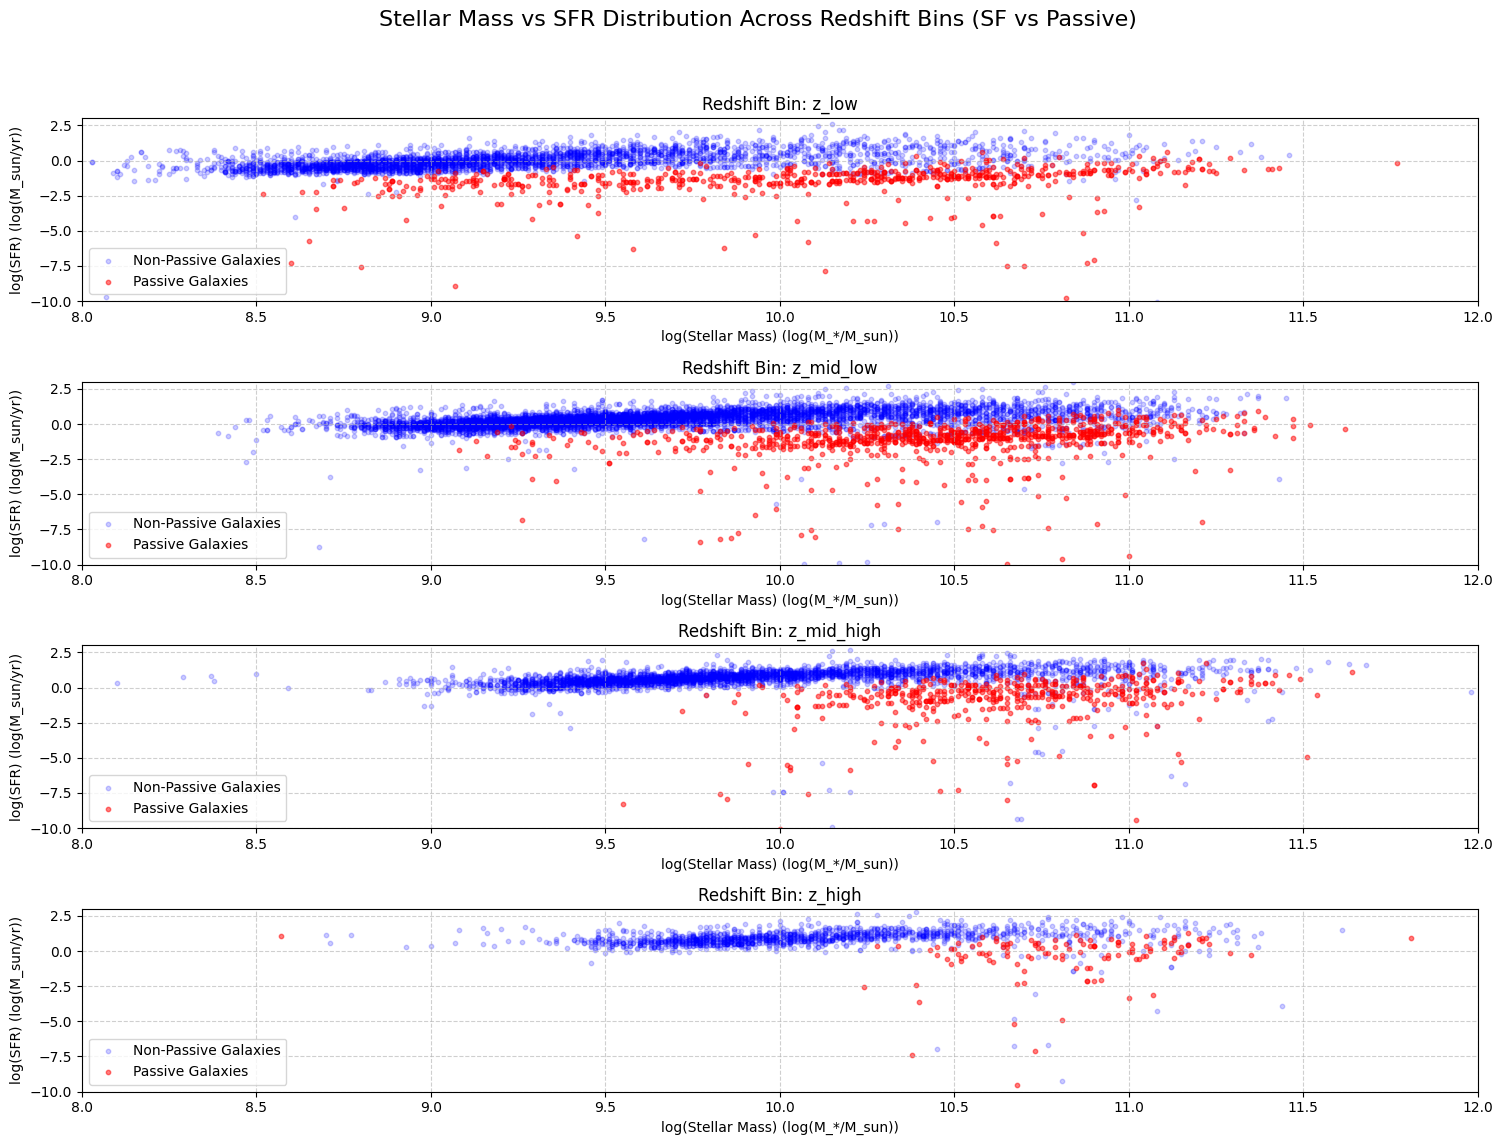

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get the list of unique redshift bin labels, sorted for consistent plotting order
redshift_bin_labels = df_galaxies['redshift_bin'].cat.categories.tolist()

# Determine the layout for subplots (4 rows, 1 column as requested by the user's snippet)
num_bins = len(redshift_bin_labels)
fig, axes = plt.subplots(num_bins, 1, figsize=(15, 12))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Determine common x-axis limits from the entire dataframe
common_lmass_min = 8
common_lmass_max = 12

# Iterate through each redshift bin and its corresponding subplot axis
for i, z_label in enumerate(redshift_bin_labels):
    ax = axes[i]

    # Filter the main DataFrame for the current redshift bin
    df_z_bin = df_galaxies[df_galaxies['redshift_bin'] == z_label]

    # Separate passive and non-passive galaxies within this bin using the 'passive' column
    df_passive_z_bin = df_z_bin[df_z_bin['passive']]
    df_non_passive_z_bin = df_z_bin[~df_z_bin['passive']]

    # Plot non-passive galaxies (e.g., in blue)
    ax.scatter(df_non_passive_z_bin['lmass'], df_non_passive_z_bin['lsfr'],
               alpha=0.2, s=10, color='blue', label='Non-Passive Galaxies')

    # Plot passive galaxies in red
    ax.scatter(df_passive_z_bin['lmass'], df_passive_z_bin['lsfr'],
               alpha=0.5, s=10, color='red', label='Passive Galaxies')

    # Set labels and title for the subplot
    ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
    ax.set_ylabel('log(SFR) (log(M_sun/yr))')
    ax.set_title(f'Redshift Bin: {z_label}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='lower left') # Add legend to distinguish colors

    # Set common x and y-axis limits for all subplots
    ax.set_xlim(common_lmass_min, common_lmass_max) # Adding a small buffer
    ax.set_ylim(-10,3) # Adding a small buffer

# Set overall titles and adjust layout
plt.suptitle('Stellar Mass vs SFR Distribution Across Redshift Bins (SF vs Passive)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent labels overlapping suptitle
plt.show()

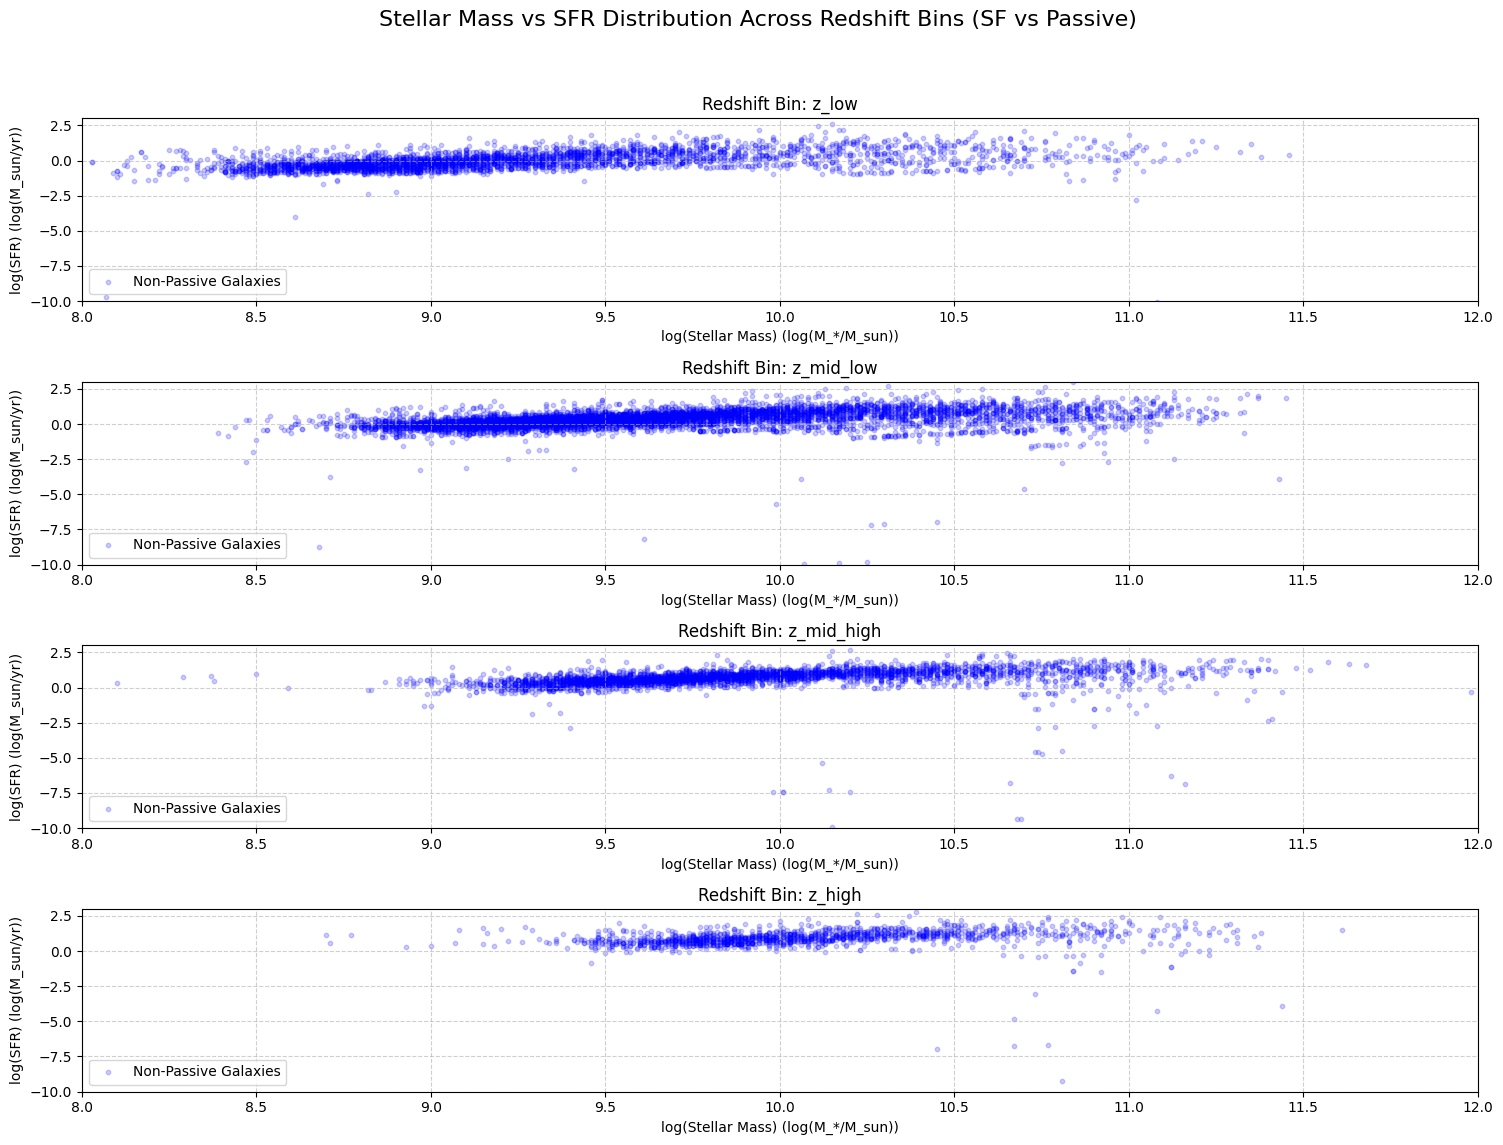

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Get the list of unique redshift bin labels, sorted for consistent plotting order
redshift_bin_labels = df_galaxies['redshift_bin'].cat.categories.tolist()

# Determine the layout for subplots (4 rows, 1 column as requested by the user's snippet)
num_bins = len(redshift_bin_labels)
fig, axes = plt.subplots(num_bins, 1, figsize=(15, 12))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Determine common x-axis limits from the entire dataframe
common_lmass_min = 8
common_lmass_max = 12

# Iterate through each redshift bin and its corresponding subplot axis
for i, z_label in enumerate(redshift_bin_labels):
    ax = axes[i]

    # Filter the main DataFrame for the current redshift bin
    df_z_bin = df_galaxies[df_galaxies['redshift_bin'] == z_label]

    # Separate passive and non-passive galaxies within this bin using the 'passive' column
    df_passive_z_bin = df_z_bin[df_z_bin['passive']]
    df_non_passive_z_bin = df_z_bin[~df_z_bin['passive']]

    # Plot non-passive galaxies (e.g., in blue)
    ax.scatter(df_non_passive_z_bin['lmass'], df_non_passive_z_bin['lsfr'],
               alpha=0.2, s=10, color='blue', label='Non-Passive Galaxies')

    # Set labels and title for the subplot
    ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
    ax.set_ylabel('log(SFR) (log(M_sun/yr))')
    ax.set_title(f'Redshift Bin: {z_label}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='lower left') # Add legend to distinguish colors

    # Set common x and y-axis limits for all subplots
    ax.set_xlim(common_lmass_min, common_lmass_max) # Adding a small buffer
    ax.set_ylim(-10,3) # Adding a small buffer

# Set overall titles and adjust layout
plt.suptitle('Stellar Mass vs SFR Distribution Across Redshift Bins (SF vs Passive)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent labels overlapping suptitle
plt.show()

In [17]:
from scipy import stats
import warnings
import pandas as pd
import numpy as np

# 1. Initialize an empty dictionary to store the fit results for each redshift bin
main_sequence_fits = {}

# 2. Define the stellar mass bins for grouping (e.g., 0.5 dex width)
mass_bins_edges = np.arange(8.5, 12.5, 0.5) # Example range from 8.5 to 12.0 in 0.5 dex steps

# Get unique redshift bin labels, sorted for consistent iteration
redshift_bin_labels = df_galaxies['redshift_bin'].cat.categories.tolist()

# 3. Loop through each unique redshift bin label
for z_label in redshift_bin_labels:
    print(f"\nProcessing redshift bin: {z_label}")

    # 4a. Filter df_galaxies for the current redshift bin and for non-passive galaxies (star-forming)
    # Remember that 'passive' column is True for passive galaxies, so '~df_z_bin['passive']' selects star-forming
    df_z_bin = df_galaxies[
        (df_galaxies['redshift_bin'] == z_label) &
        (~df_galaxies['passive']) # Select star-forming galaxies
    ].copy()

    if df_z_bin.empty:
        print(f"No star-forming galaxies found in {z_label}. Skipping.")
        continue

    # 4b. Create a new column 'mass_bin' for stellar mass bins in the filtered DataFrame
    # Use pd.cut to assign galaxies to mass bins. Labels are optional but can be useful for debugging.
    df_z_bin['mass_bin'] = pd.cut(
        df_z_bin['lmass'],
        bins=mass_bins_edges,
        labels=[f'{m:.1f}-{m+0.5:.1f}' for m in mass_bins_edges[:-1]],
        right=False, # Bins are inclusive on the left, exclusive on the right [a, b)
        include_lowest=True
    )

    # 4c. Group by 'mass_bin' and calculate the median 'lmass' and 'lsfr'
    # We need to explicitly set observed=False for older pandas versions if 'mass_bin' is categorical with unused categories
    # Also, ensure there are enough points in each bin for a robust median, e.g., at least 5 galaxies.
    grouped_mass = df_z_bin.groupby('mass_bin', observed=False).agg(
        median_lmass=('lmass', 'median'),
        median_lsfr=('lsfr', 'median'),
        count=('lmass', 'size') # Count galaxies in each mass bin
    )

    # Filter out bins with insufficient data (e.g., less than 5 galaxies) or NaN medians
    grouped_mass = grouped_mass[grouped_mass['count'] >= 5].dropna()

    if grouped_mass.empty or len(grouped_mass) < 2: # Need at least 2 points to fit a line
        print(f"Not enough mass bins with sufficient star-forming galaxies found in {z_label} for linear fit. Skipping.")
        continue

    # 4d. Extract the median 'lmass' and 'lsfr' values for the fit
    x_fit = grouped_mass['median_lmass'] # Independent variable (log(Mass))
    y_fit = grouped_mass['median_lsfr']  # Dependent variable (log(SFR))

    # 4e. Perform a linear regression (log(SFR) vs log(Mass))
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", RuntimeWarning)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_fit, y_fit)

    # Store fit parameters only if the fit was successful (no NaN values)
    if not (np.isnan(slope) or np.isnan(intercept)):
        main_sequence_fits[z_label] = {
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value,
            'p_value': p_value,
            'std_err': std_err,
            'binned_lmass': x_fit.values, # Store binned data for potential plotting
            'median_lsfr_binned': y_fit.values
        }
        print(f"  Fit results for {z_label}: Slope={slope:.3f}, Intercept={intercept:.3f}")
    else:
        print(f"  Linear regression failed for {z_label} (NaN values). Skipping.")

# 5. Print the overall main sequence fit results
print("\n--- Main Sequence Fit Results (log(SFR) = slope * log(Mass) + intercept) ---")
if not main_sequence_fits:
    print("No successful main sequence fits were obtained.")
else:
    for z_label, fit_params in main_sequence_fits.items():
        print(f"{z_label}:")
        print(f"  Slope = {fit_params['slope']:.3f}")
        print(f"  Intercept = {fit_params['intercept']:.3f}")
        print(f"  R-squared (R^2) = {fit_params['r_value']**2:.3f}")
        print("-" * 30)



Processing redshift bin: z_low
  Fit results for z_low: Slope=0.361, Intercept=-3.349

Processing redshift bin: z_mid_low
  Fit results for z_mid_low: Slope=0.415, Intercept=-3.668

Processing redshift bin: z_mid_high
  Fit results for z_mid_high: Slope=0.461, Intercept=-3.840

Processing redshift bin: z_high
  Fit results for z_high: Slope=0.358, Intercept=-2.677

--- Main Sequence Fit Results (log(SFR) = slope * log(Mass) + intercept) ---
z_low:
  Slope = 0.361
  Intercept = -3.349
  R-squared (R^2) = 0.761
------------------------------
z_mid_low:
  Slope = 0.415
  Intercept = -3.668
  R-squared (R^2) = 0.869
------------------------------
z_mid_high:
  Slope = 0.461
  Intercept = -3.840
  R-squared (R^2) = 0.949
------------------------------
z_high:
  Slope = 0.358
  Intercept = -2.677
  R-squared (R^2) = 0.845
------------------------------


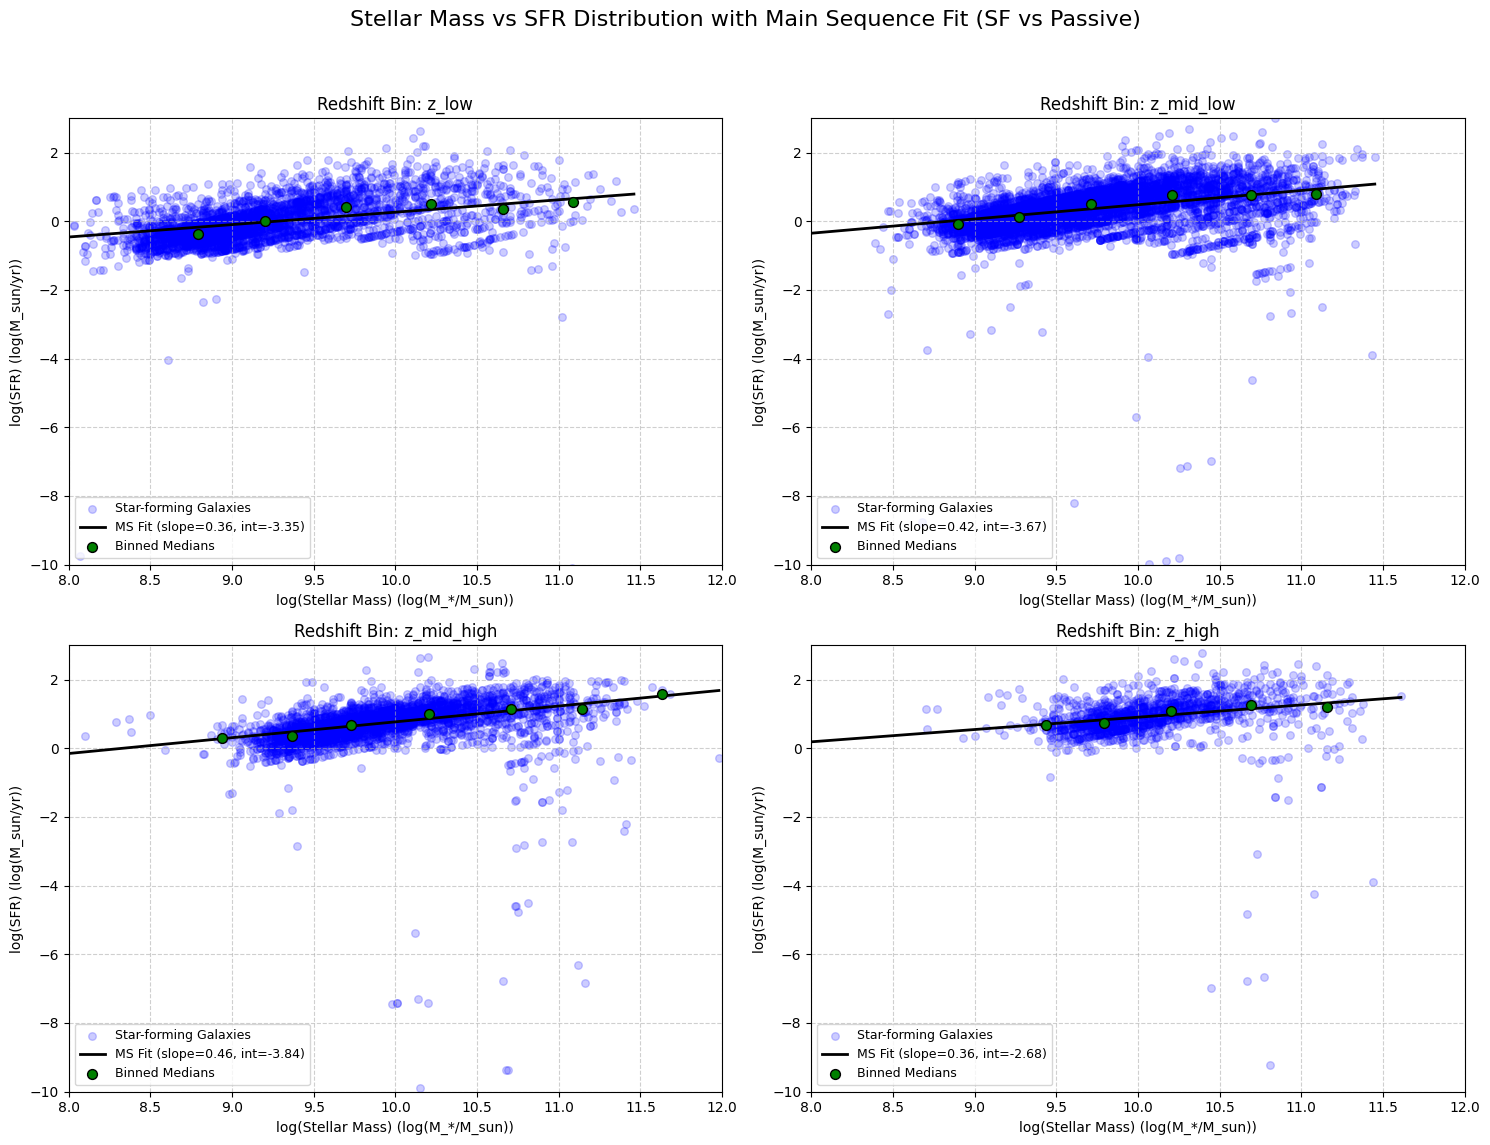

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure df_galaxies and main_sequence_fits exist from previous steps
# If this cell gives an error, please ensure the data loading, redshift binning,
# UVJ selection, and main sequence fitting cells have been run.

# Get the list of unique redshift bin labels, sorted for consistent plotting order
redshift_bin_labels = df_galaxies['redshift_bin'].cat.categories.tolist()

# Determine the layout for subplots (2 rows, 2 columns for 4 bins)
num_bins = len(redshift_bin_labels)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Determine common x-axis limits from the entire dataframe for consistency
common_lmass_min = df_galaxies['lmass'].min()
common_lmass_max = df_galaxies['lmass'].max()

# Determine common y-axis limits from the entire dataframe for consistency
common_lsfr_min = df_galaxies['lsfr'].min()
common_lsfr_max = df_galaxies['lsfr'].max()

# Iterate through each redshift bin and its corresponding subplot axis
for i, z_label in enumerate(redshift_bin_labels):
    ax = axes[i]

    # Filter the main DataFrame for the current redshift bin
    df_z_bin = df_galaxies[df_galaxies['redshift_bin'] == z_label]

    # Separate passive and non-passive galaxies within this bin using the 'passive' column
    df_passive_z_bin = df_z_bin[df_z_bin['passive']]
    df_non_passive_z_bin = df_z_bin[~df_z_bin['passive']]

    # Plot non-passive (star-forming) galaxies in blue
    ax.scatter(df_non_passive_z_bin['lmass'], df_non_passive_z_bin['lsfr'],
               alpha=0.2, s=30, color='blue', label='Star-forming Galaxies')

    # Plot the Main Sequence fit line for star-forming galaxies
    if z_label in main_sequence_fits:
        fit_params = main_sequence_fits[z_label]
        slope = fit_params['slope']
        intercept = fit_params['intercept']

        # Create a range of lmass values for the fit line
        # Use the min and max of the non-passive galaxies for a relevant range
        lmass_fit_range = np.linspace(df_non_passive_z_bin['lmass'].min(), df_non_passive_z_bin['lmass'].max(), 100)
        lsfr_fit_line = slope * lmass_fit_range + intercept

        ax.plot(lmass_fit_range, lsfr_fit_line,
                color='black', linestyle='-', linewidth=2,
                label=f'MS Fit (slope={slope:.2f}, int={intercept:.2f})')

        # Optionally plot the binned median points if available in main_sequence_fits
        if 'binned_lmass' in fit_params and 'median_lsfr_binned' in fit_params:
            ax.scatter(fit_params['binned_lmass'], fit_params['median_lsfr_binned'],
                       color='green', marker='o', s=50, edgecolor='black', zorder=5, label='Binned Medians')

    # Set labels and title for the subplot
    ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
    ax.set_ylabel('log(SFR) (log(M_sun/yr))')
    ax.set_title(f'Redshift Bin: {z_label}')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(loc='lower left', fontsize=9) # Adjust legend size if necessary

    # Set common x and y-axis limits for all subplots
    ax.set_xlim(8, 12) # Adding a small buffer
    ax.set_ylim(-10,3) # Adding a small buffer
# Set overall titles and adjust layout
plt.suptitle('Stellar Mass vs SFR Distribution with Main Sequence Fit (SF vs Passive)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent labels overlapping suptitle
plt.show()

In [21]:
import numpy as np
import pandas as pd

# 1. Determine min and max lmass values
min_lmass = df_galaxies['lmass'].min()
max_lmass = df_galaxies['lmass'].max()

print(f"Minimum log(Stellar Mass): {min_lmass:.2f}")
print(f"Maximum log(Stellar Mass): {max_lmass:.2f}")

# 2. Define stellar mass bin edges with 0.5 dex width
# np.arange creates a range [start, stop) - so add a small epsilon to include max_lmass
# or adjust the upper bound slightly if max_lmass might fall exactly on the boundary
# Using round to ensure cleaner bin edges for display, while covering the full range
mass_bins_edges = np.arange(np.floor(min_lmass * 2)/2, np.ceil(max_lmass * 2)/2 + 0.5, 0.4)

print(f"Defined stellar mass bin edges: {mass_bins_edges}")

# 3. Use pd.cut() to categorize galaxies into mass bins
df_galaxies['mass_bin'] = pd.cut(
    df_galaxies['lmass'],
    bins=mass_bins_edges,
    labels=[f'{m:.1f}-{m+0.5:.1f}' for m in mass_bins_edges[:-1]], # Optional labels for clearer bins
    right=False, # Bins are inclusive on the left, exclusive on the right [a, b)
    include_lowest=True # Ensure the minimum value is included in the first bin
)

print("Galaxies categorized into stellar mass bins.")
print("\nCount of galaxies in each stellar mass bin:")
print(df_galaxies['mass_bin'].value_counts().sort_index())

Minimum log(Stellar Mass): -99.00
Maximum log(Stellar Mass): 12.90
Defined stellar mass bin edges: [-99.  -98.6 -98.2 -97.8 -97.4 -97.  -96.6 -96.2 -95.8 -95.4 -95.  -94.6
 -94.2 -93.8 -93.4 -93.  -92.6 -92.2 -91.8 -91.4 -91.  -90.6 -90.2 -89.8
 -89.4 -89.  -88.6 -88.2 -87.8 -87.4 -87.  -86.6 -86.2 -85.8 -85.4 -85.
 -84.6 -84.2 -83.8 -83.4 -83.  -82.6 -82.2 -81.8 -81.4 -81.  -80.6 -80.2
 -79.8 -79.4 -79.  -78.6 -78.2 -77.8 -77.4 -77.  -76.6 -76.2 -75.8 -75.4
 -75.  -74.6 -74.2 -73.8 -73.4 -73.  -72.6 -72.2 -71.8 -71.4 -71.  -70.6
 -70.2 -69.8 -69.4 -69.  -68.6 -68.2 -67.8 -67.4 -67.  -66.6 -66.2 -65.8
 -65.4 -65.  -64.6 -64.2 -63.8 -63.4 -63.  -62.6 -62.2 -61.8 -61.4 -61.
 -60.6 -60.2 -59.8 -59.4 -59.  -58.6 -58.2 -57.8 -57.4 -57.  -56.6 -56.2
 -55.8 -55.4 -55.  -54.6 -54.2 -53.8 -53.4 -53.  -52.6 -52.2 -51.8 -51.4
 -51.  -50.6 -50.2 -49.8 -49.4 -49.  -48.6 -48.2 -47.8 -47.4 -47.  -46.6
 -46.2 -45.8 -45.4 -45.  -44.6 -44.2 -43.8 -43.4 -43.  -42.6 -42.2 -41.8
 -41.4 -41.  -40.6 -40.2 -3

In [23]:
import numpy as np

# 1. Initialize an empty dictionary to store the results
passive_fraction_results = {}

# Get the list of unique redshift bin labels, sorted for consistent iteration
redshift_bin_labels = df_galaxies['redshift_bin'].cat.categories.tolist()

# 2. Iterate through each unique redshift bin label
for z_label in redshift_bin_labels:
    print(f"\nProcessing redshift bin: {z_label}")

    # 3. Filter df_galaxies for the current redshift bin
    df_z_bin = df_galaxies[df_galaxies['redshift_bin'] == z_label].copy()

    if df_z_bin.empty:
        print(f"No galaxies found in {z_label}. Skipping.")
        continue

    # 4. Group by 'mass_bin'
    # Using observed=False for older pandas versions if 'mass_bin' is categorical with unused categories
    grouped_by_mass_bin = df_z_bin.groupby('mass_bin', observed=False).agg(
        total_galaxies=('lmass', 'size'),
        passive_galaxies=('passive', lambda x: x.sum()), # Sums True values (1) and False values (0)
        median_lmass=('lmass', 'median')
    )

    # Filter out bins with insufficient data (e.g., less than 5 galaxies) or NaN medians
    # Also, filter out bins where total_galaxies is 0 to avoid division by zero
    grouped_by_mass_bin = grouped_by_mass_bin[
        (grouped_by_mass_bin['total_galaxies'] >= 5) &
        (grouped_by_mass_bin['total_galaxies'] > 0)
    ].dropna()

    if grouped_by_mass_bin.empty:
        print(f"No mass bins with sufficient galaxies in {z_label}. Skipping.")
        continue

    # 6. Compute the fraction of passive galaxies
    grouped_by_mass_bin['passive_fraction'] = grouped_by_mass_bin['passive_galaxies'] / grouped_by_mass_bin['total_galaxies']

    # 7. Store the results for the current redshift bin
    passive_fraction_results[z_label] = {
        'median_lmass': grouped_by_mass_bin['median_lmass'].values,
        'passive_fraction': grouped_by_mass_bin['passive_fraction'].values,
        'total_galaxies': grouped_by_mass_bin['total_galaxies'].values, # Store total galaxies for error calculation
        'mass_bin_labels': grouped_by_mass_bin.index.astype(str).tolist() # Store bin labels for reference
    }
    print(f"  Calculated passive fractions for {len(grouped_by_mass_bin)} mass bins.")

print("\n--- Passive Fraction Results --- ")
for z_label, results in passive_fraction_results.items():
    print(f"Redshift Bin: {z_label}")
    for i in range(len(results['median_lmass'])):
        print(f"  Mass Bin {results['mass_bin_labels'][i]}: Median lmass={results['median_lmass'][i]:.2f}, Passive Fraction={results['passive_fraction'][i]:.3f} (Total: {results['total_galaxies'][i]})")


Processing redshift bin: z_low
  Calculated passive fractions for 10 mass bins.

Processing redshift bin: z_mid_low
  Calculated passive fractions for 9 mass bins.

Processing redshift bin: z_mid_high
  Calculated passive fractions for 9 mass bins.

Processing redshift bin: z_high
  Calculated passive fractions for 7 mass bins.

--- Passive Fraction Results --- 
Redshift Bin: z_low
  Mass Bin 7.8-8.3: Median lmass=8.12, Passive Fraction=0.000 (Total: 20)
  Mass Bin 8.2-8.7: Median lmass=8.50, Passive Fraction=0.014 (Total: 289)
  Mass Bin 8.6-9.1: Median lmass=8.82, Passive Fraction=0.045 (Total: 1042)
  Mass Bin 9.0-9.5: Median lmass=9.18, Passive Fraction=0.115 (Total: 914)
  Mass Bin 9.4-9.9: Median lmass=9.58, Passive Fraction=0.159 (Total: 603)
  Mass Bin 9.8-10.3: Median lmass=10.00, Passive Fraction=0.297 (Total: 421)
  Mass Bin 10.2-10.7: Median lmass=10.38, Passive Fraction=0.446 (Total: 379)
  Mass Bin 10.6-11.1: Median lmass=10.75, Passive Fraction=0.528 (Total: 214)
  Mass

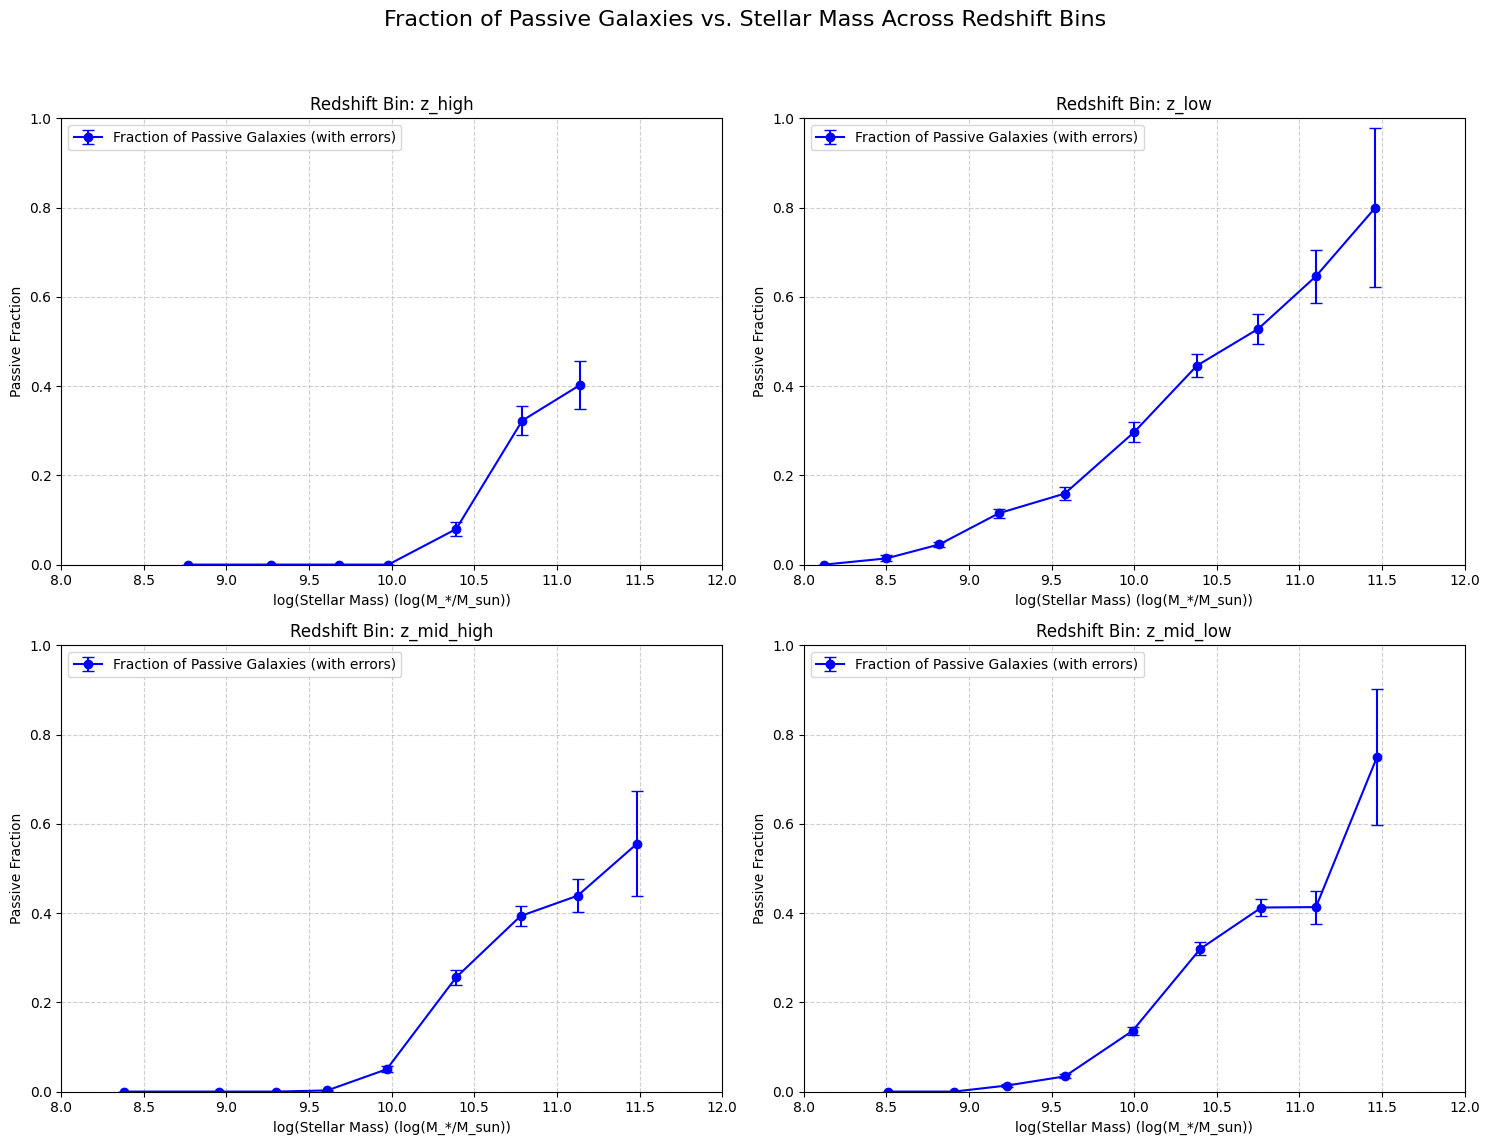

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure passive_fraction_results exists from previous steps
# If this cell gives an error, please ensure the data loading, redshift binning,
# mass binning, and passive fraction calculation cells have been run.

# Get the list of unique redshift bin labels, sorted for consistent plotting order
# (using keys from passive_fraction_results to ensure only processed bins are plotted)
redshift_bin_labels = sorted(passive_fraction_results.keys())

# Determine the layout for subplots (2 rows, 2 columns for 4 bins)
num_bins = len(redshift_bin_labels)
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # 2x2 grid
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Define common x and y-axis limits for all subplots for better comparison
common_lmass_min_plot = 8.0
common_lmass_max_plot = 12.0
common_passive_frac_min_plot = 0.0
common_passive_frac_max_plot = 1.0

# Iterate through each redshift bin and its corresponding subplot axis
for i, z_label in enumerate(redshift_bin_labels):
    ax = axes[i]

    # Retrieve data for the current redshift bin from passive_fraction_results
    if z_label in passive_fraction_results:
        results = passive_fraction_results[z_label]
        median_lmass = results['median_lmass']
        passive_fraction = results['passive_fraction']
        total_galaxies = results['total_galaxies']

        # Calculate error bars using binomial proportion standard error
        # SE = sqrt(p * (1 - p) / n)
        # Avoid division by zero for n=0 cases, though filtered earlier, good to be safe.
        # Also handle cases where p is 0 or 1 to avoid sqrt(negative) or 0 error
        passive_fraction_error = np.zeros_like(passive_fraction, dtype=float)
        valid_indices = total_galaxies > 0

        p = passive_fraction[valid_indices]
        n = total_galaxies[valid_indices]

        # Clamp p to avoid numerical issues with 0 or 1
        p = np.clip(p, 1e-9, 1.0 - 1e-9)

        passive_fraction_error[valid_indices] = np.sqrt(p * (1 - p) / n)

        # Create an error bar plot
        ax.errorbar(median_lmass, passive_fraction, yerr=passive_fraction_error,
                    marker='o', linestyle='-', color='blue', capsize=4,
                    label='Fraction of Passive Galaxies (with errors)')

        # Set labels and title for the subplot
        ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
        ax.set_ylabel('Passive Fraction')
        ax.set_title(f'Redshift Bin: {z_label}')
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.legend(loc='upper left')

        # Set common x and y-axis limits
        ax.set_xlim(common_lmass_min_plot, common_lmass_max_plot)
        ax.set_ylim(common_passive_frac_min_plot, common_passive_frac_max_plot)
    else:
        ax.set_title(f'Redshift Bin: {z_label} (No Data)')
        ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
        ax.set_ylabel('Passive Fraction')
        ax.grid(True, linestyle='--', alpha=0.6)

# Set overall titles and adjust layout
plt.suptitle('Fraction of Passive Galaxies vs. Stellar Mass Across Redshift Bins', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent labels overlapping suptitle
plt.show()

/tmp/ipython-input-3186106801.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(redshift_bin_labels))


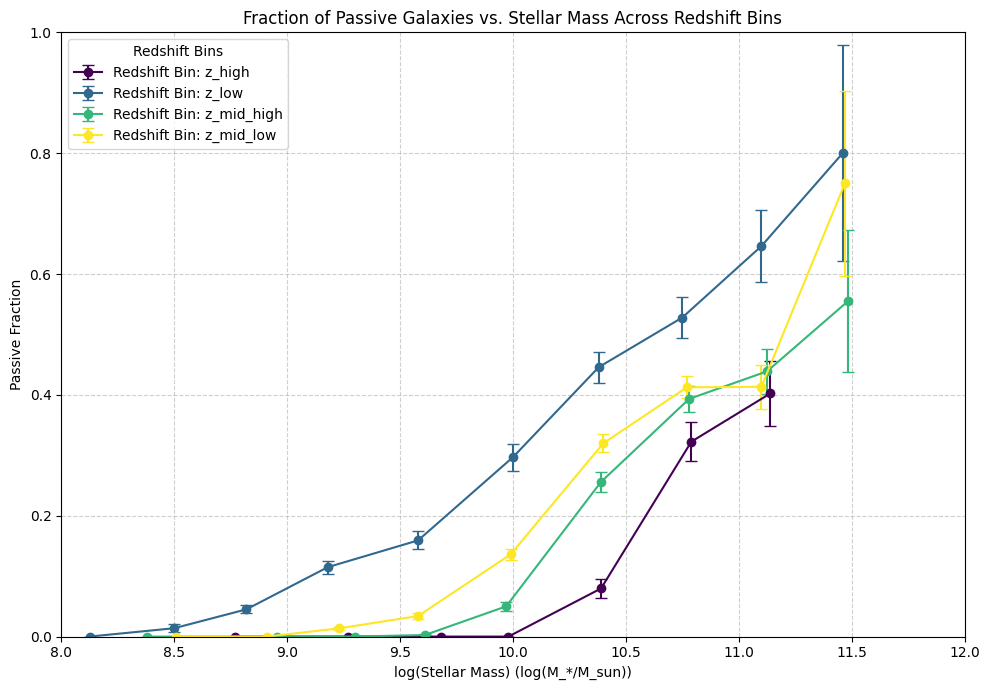

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure passive_fraction_results exists from previous steps
# If not, please run the data loading, redshift binning, mass binning,
# and passive fraction calculation cells first.

# Get the list of unique redshift bin labels, sorted for consistent plotting order
redshift_bin_labels = sorted(passive_fraction_results.keys())

# Define a color map for the different redshift bins
# You can choose a different colormap or list of colors if you prefer
colors = plt.cm.get_cmap('viridis', len(redshift_bin_labels))

# Create a single figure and axes for the combined plot
plt.figure(figsize=(10, 7))
ax = plt.gca()

# Define common x and y-axis limits for all plots for better comparison
common_lmass_min_plot = 8.0
common_lmass_max_plot = 12.0
common_passive_frac_min_plot = 0.0
common_passive_frac_max_plot = 1.0

# Iterate through each redshift bin and plot its data on the single axes
for i, z_label in enumerate(redshift_bin_labels):
    # Retrieve data for the current redshift bin from passive_fraction_results
    if z_label in passive_fraction_results:
        results = passive_fraction_results[z_label]
        median_lmass = results['median_lmass']
        passive_fraction = results['passive_fraction']
        total_galaxies = results['total_galaxies']

        # Calculate error bars using binomial proportion standard error
        passive_fraction_error = np.zeros_like(passive_fraction, dtype=float)
        valid_indices = total_galaxies > 0

        p = passive_fraction[valid_indices]
        n = total_galaxies[valid_indices]

        # Clamp p to avoid numerical issues with 0 or 1
        p = np.clip(p, 1e-9, 1.0 - 1e-9)

        passive_fraction_error[valid_indices] = np.sqrt(p * (1 - p) / n)

        # Create an error bar plot for the current redshift bin
        ax.errorbar(median_lmass, passive_fraction, yerr=passive_fraction_error,
                    marker='o', linestyle='-', color=colors(i), capsize=4,
                    label=f'Redshift Bin: {z_label}')
    else:
        print(f"No data available for Redshift Bin: {z_label}")

# Set labels and title for the combined plot
ax.set_xlabel('log(Stellar Mass) (log(M_*/M_sun))')
ax.set_ylabel('Passive Fraction')
ax.set_title('Fraction of Passive Galaxies vs. Stellar Mass Across Redshift Bins')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left', title='Redshift Bins')

# Set common x and y-axis limits for the single plot
ax.set_xlim(common_lmass_min_plot, common_lmass_max_plot)
ax.set_ylim(common_passive_frac_min_plot, common_passive_frac_max_plot)

plt.tight_layout()
plt.show()